# Import Libraries

In [138]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# PCA
from sklearn.decomposition import PCA


# Helper Functions

In [139]:
def quick_look(x):
    print(data[x].value_counts())
    print(f'\nMissing Values: {data[x].isna().sum()}')

# Import Data

In [140]:
data = pd.read_csv('./datasets/working_data/austin_clean_breed_stats.csv')

In [141]:
data.head()

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4 days 23:17:00
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0 days 02:52:00
2,A141142,Bettie,2013-11-16 14:46:00,Austin (TX),stray,aged,15.0,labrador retriever/pit bull,Black/White,2013-11-17 11:40:00,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0 days 20:54:00
3,A163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),stray,normal,15.0,miniature schnauzer,Black/Gray,2014-11-14 19:28:00,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0 days 04:17:00
4,A165752,Pep,2014-09-15 11:28:00,Gatlin Gun Rd And Brodie in Austin (TX),stray,normal,15.0,lhasa apso,Brown/White,2014-09-15 16:35:00,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0 days 05:07:00


In [142]:
data.columns

Index(['id', 'name', 'date_in', 'location', 'intake_type', 'condition',
       'age_in', 'breed', 'color', 'date_out', 'dob', 'outcome', 'age_out',
       'sex', 'intact_in', 'intact_out', 'age', 'primary_color',
       'secondary_color', 'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower',
       'reps_upper', 'height_low_inches', 'height_high_inches',
       'weight_low_lbs', 'weight_high_lbs', 'time_in_shelter'],
      dtype='object')

In [143]:
data.drop(columns=['id', 'name', 'date_in', 'location', 'color', 'date_out', 'dob', 'intact_in'], inplace=True)

In [144]:
data['time_in_shelter'] = pd.to_timedelta(data['time_in_shelter'])
data['time_in_shelter'] = data['time_in_shelter'].dt.days

In [145]:
data['time_in_shelter'].mean()

16.30482792582912

In [146]:
data.head()

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,surrender,normal,10.0,dachshund,transfer,10.0,1,0,Senior,tricolor,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4
1,public_assist,injured,16.0,shetland sheepdog,return_owner,16.0,1,0,Senior,brown,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0
2,stray,aged,15.0,labrador retriever/pit bull,return_owner,15.0,0,0,Senior,black,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0
3,stray,normal,15.0,miniature schnauzer,return_owner,15.0,0,1,Senior,black,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0
4,stray,normal,15.0,lhasa apso,return_owner,15.0,1,0,Senior,brown,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0


<AxesSubplot:>

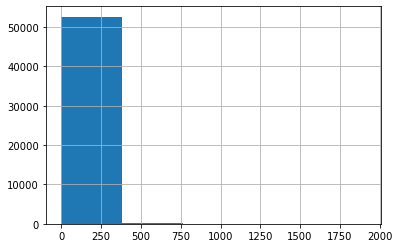

In [147]:
data['time_in_shelter'].hist(bins=5)

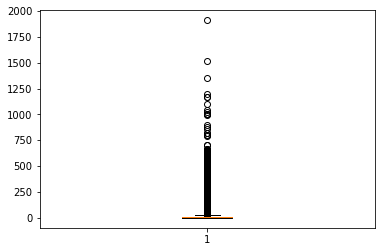

In [148]:
plt.boxplot(x=data['time_in_shelter']);

<AxesSubplot:>

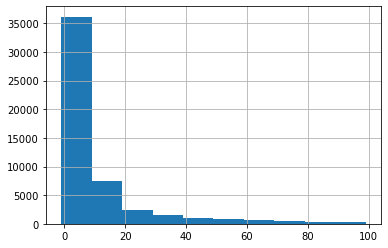

In [149]:
data[data['time_in_shelter'] < 100]['time_in_shelter'].hist()

In [150]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['intake_type', 'condition', 'breed', 'outcome', 'age_out', 'age', 'time_in_shelter']]

,intake_type,condition,breed,outcome,age_out,age,time_in_shelter
1833,stray,injured,pit bull,adoption,11.0,Senior,1912
19465,surrender,normal,pit bull,adoption,5.0,Adult,1521
23211,stray,normal,labrador retriever,transfer,6.0,Adult,1351
34528,surrender,normal,pit bull,adoption,11.0,Senior,1195
32171,stray,normal,boxer,adoption,13.0,Senior,1167
...,...,...,...,...,...,...,...
26711,surrender,normal,labrador retriever,adoption,8.0,Adult,202
1758,stray,normal,chihuahua,adoption,5.0,Adult,202
29112,stray,normal,boxer,adoption,10.0,Senior,201
11485,stray,injured,dachshund,adoption,2.0,Adult,201


In [151]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['breed']].value_counts()

breed                                   
pit bull                                    205
labrador retriever                           60
chihuahua                                    28
australian cattle dog                        23
bulldog                                      17
                                           ... 
harrier                                       1
jack russell terrier                          1
labrador retriever/australian cattle dog      1
labrador retriever/boxer                      1
yorkshire terrier                             1
Length: 85, dtype: int64

In [152]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['condition']].value_counts()

condition
normal       435
injured       52
sick          18
aged           8
other          4
behavior       1
medical        1
nursing        1
dtype: int64

These are likely incorrect exit dates due to a bad data merge or incorrectly labeled. Shelter has a max capacity of only 350 dogs per their website. Will explore pit bull time in shelter more closely to confirm we still see the extended time in shelter relationship. Considering the proportion of our data that is above 60 days in shelter (aveage being only 15 days), it is highly unlikely dogs will remain in the shelter for 200 days or more. Especially considering their condition upon entry is 'normal'.

In [153]:
data = data[data['time_in_shelter'] < 200].copy()

Dropping dogs in the shelter with extended stay.

In [154]:
quick_look('intake_type')

stray            38654
surrender         8968
public_assist     4239
abandoned          246
euth_request       164
Name: intake_type, dtype: int64

Missing Values: 0


In [155]:
quick_look('condition')

normal      46097
injured      2742
sick         1646
nursing      1153
aged          318
other         101
medical        88
pregnant       63
neonatal       44
behavior       19
Name: condition, dtype: int64

Missing Values: 0


In [156]:
data.groupby('intake_type').mean()['time_in_shelter']

intake_type
abandoned        15.308943
euth_request      3.274390
public_assist    11.221515
stray            12.550887
surrender        15.095897
Name: time_in_shelter, dtype: float64

In [157]:
data['intake_type'].value_counts(normalize=True)

stray            0.739492
surrender        0.171567
public_assist    0.081097
abandoned        0.004706
euth_request     0.003137
Name: intake_type, dtype: float64

In [158]:
data.groupby(by='intake_type').mean()

,age_in,age_out,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
intake_type,,,,,,,,,,,,,
abandoned,1.284553,1.321138,0.491870,0.345528,0.796748,0.676520,17.822738,30.880946,17.434601,20.380427,43.202628,57.326133,15.308943
euth_request,8.286585,8.286585,0.567073,0.402439,0.859756,0.687796,18.242021,30.306608,16.786765,19.809561,42.255958,54.903555,3.274390
public_assist,3.518283,3.542109,0.582921,0.347488,0.864355,0.632681,21.551548,35.766921,15.958727,18.740488,38.495228,50.449358,11.221515
stray,2.318285,2.345915,0.530476,0.275470,0.851995,0.636430,21.208318,35.788596,16.026496,18.941262,38.447295,51.173035,12.550887
surrender,2.675401,2.698372,0.495317,0.241414,0.801070,0.625875,22.014101,37.007499,15.658726,18.536105,37.384999,50.045452,15.095897


In [159]:
quick_look('outcome')

adoption        23732
transfer        13924
return_owner    12771
euthanasia       1522
died              263
disposal           41
missing            18
Name: outcome, dtype: int64

Missing Values: 0


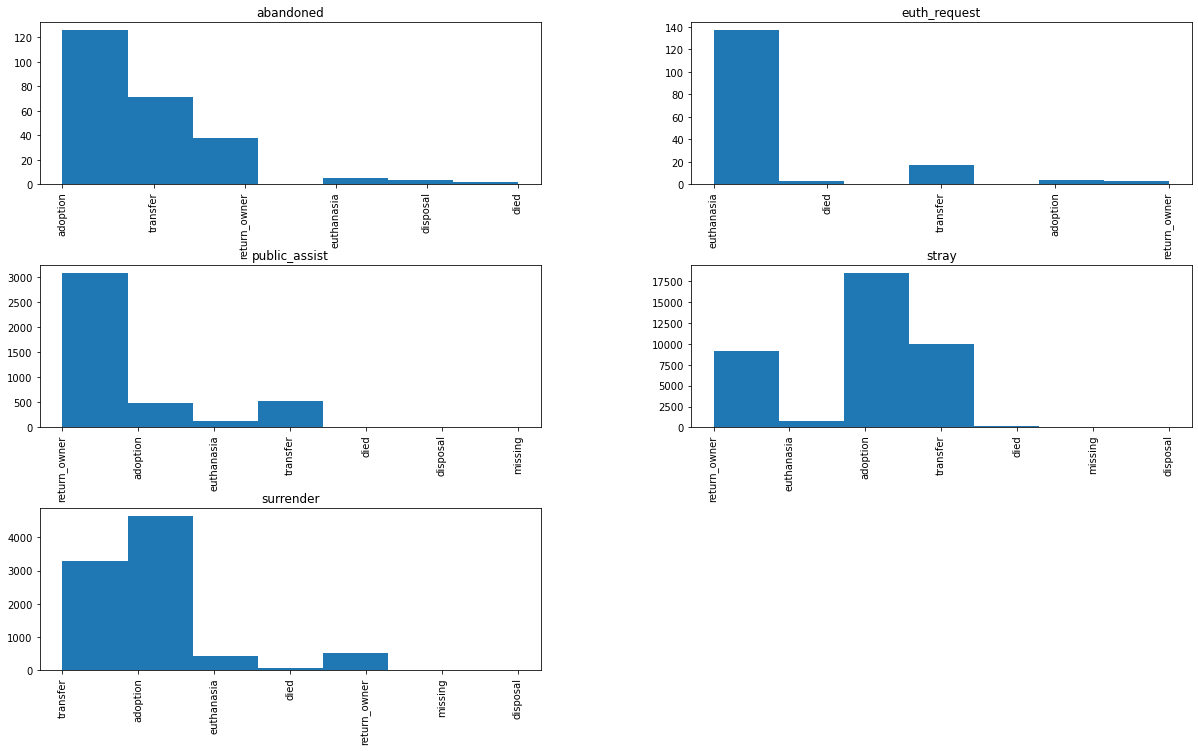

In [160]:
data['outcome'].hist(by=data['intake_type'], figsize=(20,12), bins=7);

In [161]:
data = data[data['intake_type'] != 'euth_request'].copy()

Will drop euth_requests from the set. 

In [162]:
quick_look('sex')

1    27539
0    24568
Name: sex, dtype: int64

Missing Values: 0


In [163]:
data.groupby('sex').mean()['time_in_shelter']

sex
0    12.924332
1    12.866517
Name: time_in_shelter, dtype: float64

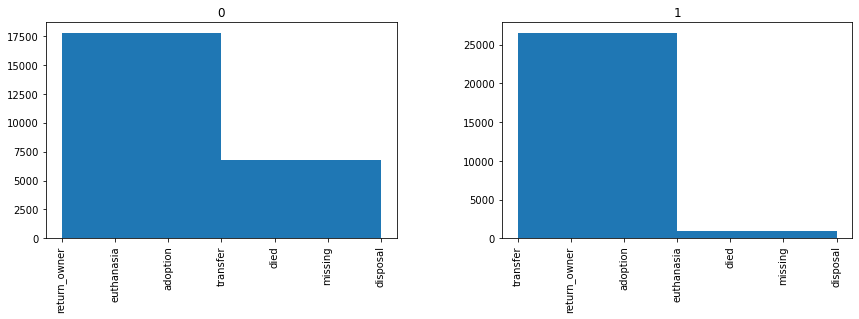

In [164]:
data['outcome'].hist(by=data['sex'], figsize=(14,4), bins=2);

In [165]:
data.groupby('age').mean()['time_in_shelter'].sort_values()

age
Senior    10.433380
Baby      10.518893
Young     13.306043
Adult     14.617946
Name: time_in_shelter, dtype: float64

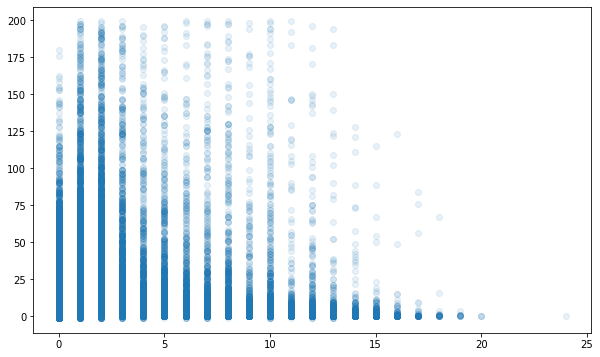

In [166]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['age_out'], y=data['time_in_shelter'], alpha=.1)

In [167]:
data.describe()

,age_in,age_out,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
count,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000
mean,2.472489,2.499050,0.528509,0.275798,0.843975,0.634498,21.358938,35.973446,15.964335,18.861993,38.290816,50.949146,12.893776
std,3.132268,3.144789,0.499191,0.446920,0.362883,0.260839,19.539076,29.716115,6.136908,6.518874,25.613502,32.492967,23.916978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,4.000000,6.000000,8.000000,2.000000,5.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.475000,1.000000,4.000000,10.000000,12.500000,16.000000,20.000000,2.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.700000,16.000000,25.000000,17.000000,20.000000,40.000000,50.000000,5.000000
75%,3.000000,3.000000,1.000000,1.000000,1.000000,0.950000,33.500000,57.500000,21.000000,24.000000,55.000000,80.000000,11.000000
max,24.000000,24.000000,1.000000,1.000000,1.000000,0.950000,81.000000,100.000000,48.000000,66.000000,175.000000,190.000000,199.000000


In [168]:
data[data['time_in_shelter'] <= 1]['outcome'].value_counts(normalize=True)

return_owner    0.621997
transfer        0.259981
adoption        0.055473
euthanasia      0.051979
died            0.009260
disposal        0.001223
missing         0.000087
Name: outcome, dtype: float64

In [169]:
data[data['time_in_shelter'] <= 2]['outcome'].value_counts(normalize=True)

return_owner    0.595115
transfer        0.258549
adoption        0.089274
euthanasia      0.047150
died            0.008637
disposal        0.001062
missing         0.000212
Name: outcome, dtype: float64

In [170]:
data[data['time_in_shelter'] <= 3]['outcome'].value_counts(normalize=True)

return_owner    0.524736
transfer        0.284431
adoption        0.136700
euthanasia      0.043557
died            0.009155
disposal        0.001194
missing         0.000227
Name: outcome, dtype: float64

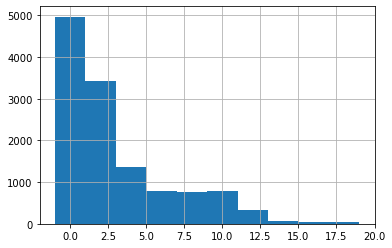

In [171]:
data[(data['outcome'] == 'return_owner') & (data['time_in_shelter'] < 20)]['time_in_shelter'].hist();

Going to exclude dogs that are returned to the owner or transfered out. A large portion happen very quickly and will add noise to the predictions.

In [172]:
data = data[data['outcome'] != 'return_owner'].copy()

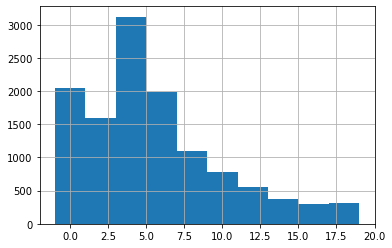

In [173]:
data[(data['outcome'] == 'transfer') & (data['time_in_shelter'] < 20)]['time_in_shelter'].hist();

In [174]:
data[data['outcome'] == 'transfer'].groupby('condition').size().sort_values()

condition
behavior        3
neonatal       27
pregnant       34
medical        40
other          41
aged           62
nursing       586
injured       857
sick          862
normal      11395
dtype: int64

Take a look at outcomes.

In [175]:
np.round(data.groupby('outcome').mean()['time_in_shelter'].sort_values(), 2)

outcome
disposal       4.00
died           8.55
euthanasia     9.16
transfer      10.12
adoption      20.07
missing       37.67
Name: time_in_shelter, dtype: float64

In [176]:
data.groupby('outcome').size().sort_values()

outcome
missing          18
disposal         41
died            260
euthanasia     1385
transfer      13907
adoption      23728
dtype: int64

In [177]:
data = data[~data['outcome'].isin(['missing', 'disposal', 'transfer'])].copy()

Can drop missing & disposal as they are a tiny sample size and likely only going to add noise. Dogs that are transfered are transferred quickly, typically

In [178]:
data.groupby('condition').mean()['time_in_shelter'].sort_values()

condition
normal      17.905378
sick        19.595318
aged        20.950617
medical     28.146341
injured     29.472903
other       42.324324
nursing     51.485030
neonatal    55.181818
behavior    58.555556
pregnant    59.115385
Name: time_in_shelter, dtype: float64

In [179]:
data.groupby('condition').size().sort_values()

condition
behavior        9
neonatal       11
pregnant       26
other          37
medical        41
aged           81
nursing       501
sick          598
injured      1347
normal      22722
dtype: int64

Combine pregnant & nursing along with medical, sick & injured. Will drop neonatal as the dogs are too young to be released from the shelter within a specific time period and the dogs we are attempting to classify will all be older than a couple weeks.

In [180]:
data = data[data['condition'] != 'neonatal'].copy()

In [181]:
data.loc[data['condition'] == 'pregnant', 'condition'] = 'nursing'
data.loc[data['condition'] == 'medical', 'condition'] = 'injured'
data.loc[data['condition'] == 'sick', 'condition'] = 'injured'

In [182]:
data.groupby('condition').mean()['time_in_shelter'].sort_values()

condition
normal      17.905378
aged        20.950617
injured     26.471299
other       42.324324
nursing     51.861480
behavior    58.555556
Name: time_in_shelter, dtype: float64

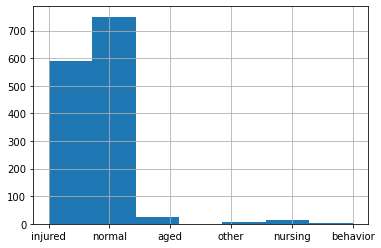

In [183]:
data[data['outcome']=='euthanasia']['condition'].hist(bins=7);

<AxesSubplot:>

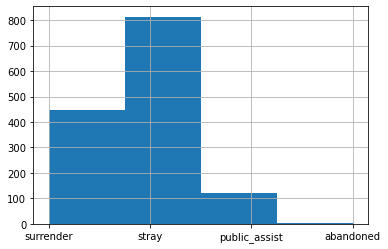

In [184]:
data[data['outcome']=='euthanasia']['intake_type'].hist(bins=4)

In [185]:
data.groupby('outcome').mean()['time_in_shelter']

outcome
adoption      20.055064
died           8.550000
euthanasia     9.140173
Name: time_in_shelter, dtype: float64

In [186]:
data.groupby('condition').size().sort_values()

condition
behavior        9
other          37
aged           81
nursing       527
injured      1986
normal      22722
dtype: int64

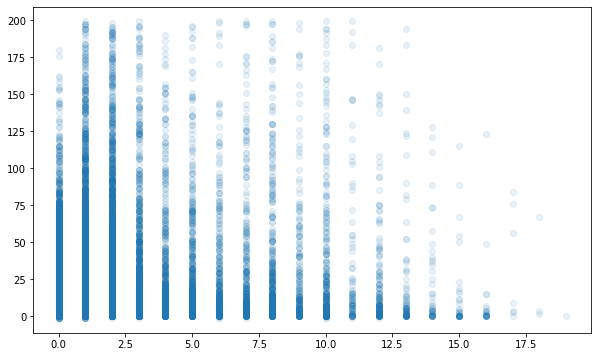

In [187]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['age_out'], y=data['time_in_shelter'], alpha=.1)

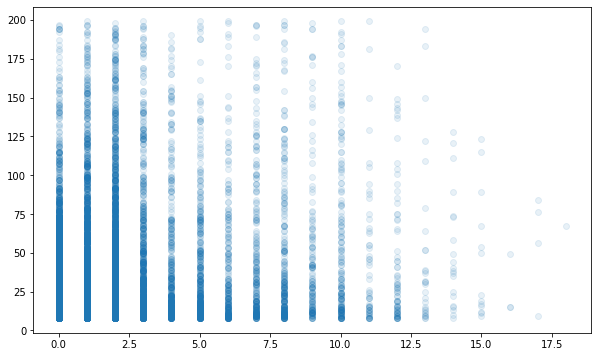

In [188]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data[data['time_in_shelter'] > 7]['age_in'], y=data[data['time_in_shelter'] > 7]['time_in_shelter'], alpha=.1);


In [189]:
data.groupby('age').mean()['time_in_shelter'].sort_values()

age
Baby      14.521703
Young     17.660171
Adult     24.357340
Senior    28.926425
Name: time_in_shelter, dtype: float64

Some relationships between age and time in shelter are beginning to show.

Younger dogs get adopted sooner.

In [190]:
data.groupby('intake_type').mean()['time_in_shelter'].sort_values()

intake_type
stray            18.827863
abandoned        19.130769
surrender        20.311115
public_assist    27.478191
Name: time_in_shelter, dtype: float64

In [191]:
data.groupby('condition').mean()['time_in_shelter'].sort_values()

condition
normal      17.905378
aged        20.950617
injured     26.471299
other       42.324324
nursing     51.861480
behavior    58.555556
Name: time_in_shelter, dtype: float64

In [192]:
data.groupby('outcome').mean()['time_in_shelter'].sort_values()

outcome
died           8.550000
euthanasia     9.140173
adoption      20.055064
Name: time_in_shelter, dtype: float64

In [193]:
data['breed_1'].value_counts()[:20]

labrador retriever       4066
chihuahua                3890
pit bull                 3456
german shepherd          1997
australian cattle dog    1323
dachshund                 945
border collie             610
siberian husky            548
boxer                     481
australian shepherd       431
fox terrier               386
great pyrenees            382
jack russell terrier      380
miniature poodle          379
beagle                    347
cairn terrier             342
yorkshire terrier         338
pointer                   331
miniature schnauzer       301
anatolian sheepdog        289
Name: breed_1, dtype: int64

In [194]:
common_breeds = list(data['breed_1'].value_counts()[:20].index)

In [195]:
data[data['breed_1'].isin(common_breeds)].groupby('pure').mean()['time_in_shelter']

pure
0.0    19.920321
1.0    19.899961
Name: time_in_shelter, dtype: float64

No relationship to pure breed vs mutt

In [196]:
data[data['breed_1'].isin(common_breeds)]

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
7,surrender,normal,16.0,dachshund,adoption,16.0,1,0,Senior,black,...,dachshund,1.0,0.500,26.0,40.0,7.0,10.0,16.0,32.0,49
8,surrender,injured,14.0,border collie,euthanasia,14.0,1,0,Senior,black,...,border collie,1.0,0.950,1.0,4.0,19.0,21.0,40.0,40.0,0
9,public_assist,aged,17.0,chihuahua,adoption,17.0,1,0,Senior,tan,...,chihuahua,1.0,0.300,41.0,80.0,6.0,9.0,2.0,5.0,9
14,stray,injured,16.0,pit bull,euthanasia,16.0,0,0,Senior,brown,...,pit bull,1.0,0.700,16.0,25.0,17.0,19.0,40.0,50.0,0
16,stray,normal,15.0,labrador retriever/beagle,adoption,15.0,1,0,Senior,sable,...,beagle,0.0,0.525,41.0,52.0,17.0,20.0,36.5,55.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52764,abandoned,normal,0.0,siberian husky,adoption,0.0,0,0,Baby,black,...,siberian husky,1.0,0.500,26.0,40.0,20.0,23.0,40.0,60.0,7
52776,abandoned,normal,0.0,australian cattle dog,adoption,0.0,0,0,Baby,brown,...,australian cattle dog,1.0,0.950,1.0,4.0,17.0,20.0,35.0,45.0,6
52777,abandoned,normal,0.0,australian cattle dog,adoption,0.0,0,0,Baby,brown,...,australian cattle dog,1.0,0.950,1.0,4.0,17.0,20.0,35.0,45.0,7
52779,abandoned,normal,0.0,pit bull,adoption,0.0,0,0,Baby,white,...,pit bull,1.0,0.700,16.0,25.0,17.0,19.0,40.0,50.0,7


In [197]:
data['breed_2'].value_counts().tail(25)

ibizan hound                   6
chinese crested                5
field spaniel                  5
keeshond                       4
irish wolfhound                4
samoyed                        3
clumber spaniel                3
kuvasz                         3
german pinscher                3
wirehaired pointing griffon    3
skye terrier                   3
belgian sheepdog               3
welsh springer spaniel         3
english setter                 3
saluki                         2
borzoi                         2
gordon setter                  2
lakeland terrier               2
irish setter                   2
english springer spaniel       1
japanese chin                  1
belgian tervuren               1
norwegian elkhound             1
otterhound                     1
old english sheepdog           1
Name: breed_2, dtype: int64

In [198]:
data['time_in_shelter'].mean()

19.341495150224745

Set time cutoffs

In [199]:
data['at_risk'] = np.where(data['time_in_shelter'] > 20, 1, 0)

In [200]:
data['at_risk'].value_counts(normalize=True)

0    0.752583
1    0.247417
Name: at_risk, dtype: float64

In [201]:
data[data['time_in_shelter'] > 7]['at_risk'].value_counts(normalize=True)

1    0.540995
0    0.459005
Name: at_risk, dtype: float64

Final Clean for export

In [202]:
data = data[data['time_in_shelter'] > 7].copy()

In [203]:
data = data[
        (data['intake_type'] != 'euth_request')                                         &
        (~data['outcome'].isin(['return_owner', 'missing', 'disposal', 'transfer']))    &
        (data['condition'] != 'neonatal')
]

In [204]:
data.loc[data['condition'] == 'pregnant', 'cond'] = 'nursing'
data.loc[data['condition'] == 'medical', 'cond'] = 'injured'
data.loc[data['condition'] == 'sick', 'cond'] = 'injured'
data['age'] = data['age'].str.lower()

Creat classifier for dogs not in top 20 most common breeds.

In [205]:
data['breed_3'] = np.where(~data['breed_1'].isin(common_breeds), 'other', data['breed_1'])

In [206]:
data['breed_3'].value_counts()

pit bull                 2390
labrador retriever       2088
other                    1668
chihuahua                1352
german shepherd           984
australian cattle dog     697
border collie             291
dachshund                 289
boxer                     270
siberian husky            244
australian shepherd       198
great pyrenees            172
pointer                   164
jack russell terrier      132
beagle                    123
fox terrier               112
miniature poodle           98
cairn terrier              96
anatolian sheepdog         89
miniature schnauzer        76
yorkshire terrier          66
Name: breed_3, dtype: int64

# Export Model Data

In [207]:
data.to_csv('./datasets/working_data/model_data_full.csv', index=False)